In [1]:
import  pandas as pd 
df = pd.read_csv('tips.csv')
df.head(10)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [2]:
len(df)

244

In [3]:
df.total_bill.count()

244

In [4]:
df['total_bill'].max()

50.81

In [5]:
%matplotlib inline

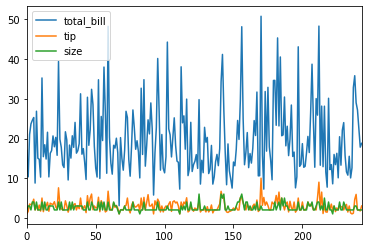

In [6]:
df.plot()

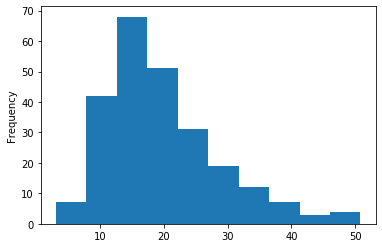

In [7]:
df['total_bill'].plot(kind = 'hist')

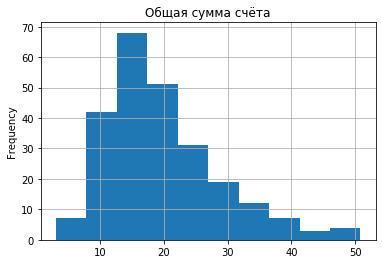

In [8]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

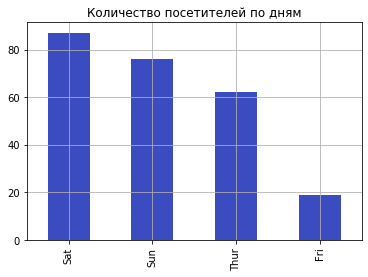

In [9]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

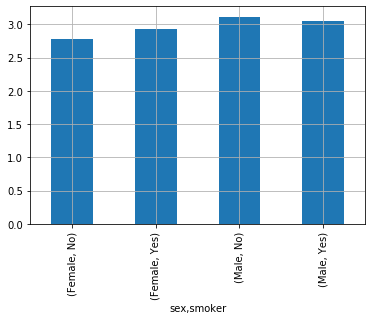

In [10]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E008F2988>,
      dtype=object)

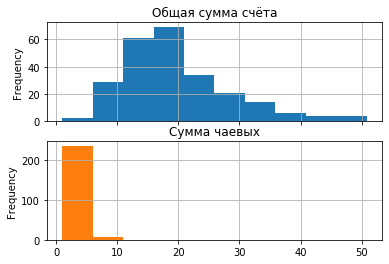

In [11]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

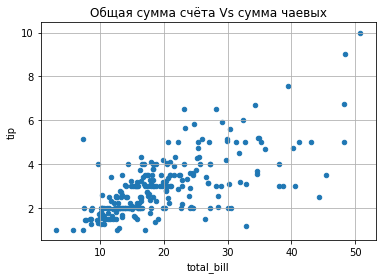

In [12]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

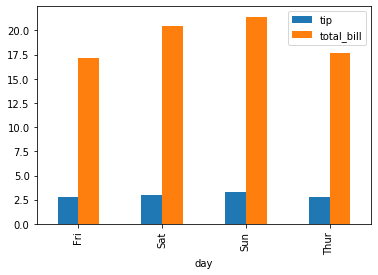

In [13]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

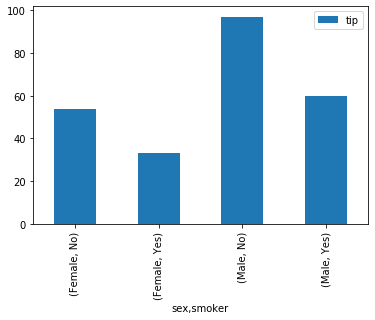

In [14]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

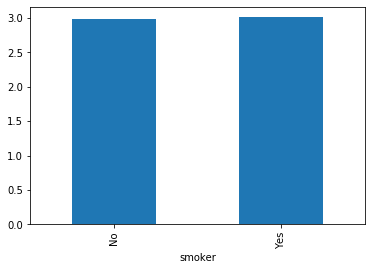

In [15]:
df.groupby('smoker')['tip'].mean().plot(kind = 'bar')

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tips.csv')

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

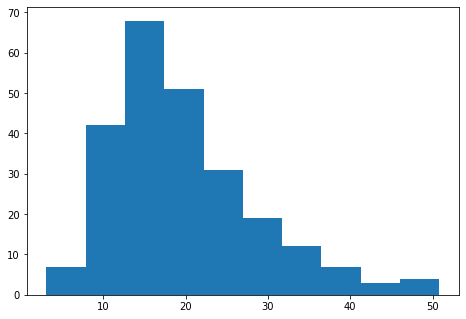

In [17]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

Text(0.5, 0, 'Сумма заказа, USD')

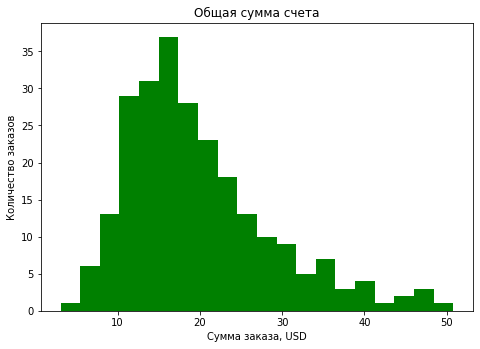

In [18]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

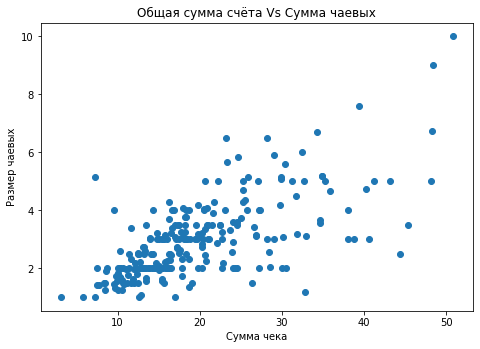

In [19]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

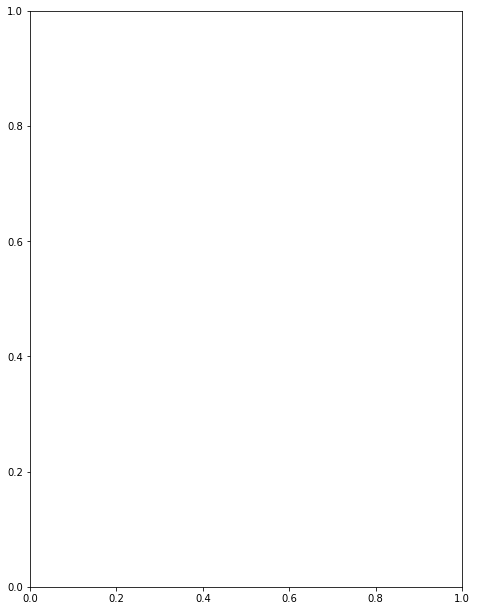

In [20]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 2])

In [21]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

<BarContainer object of 4 artists>

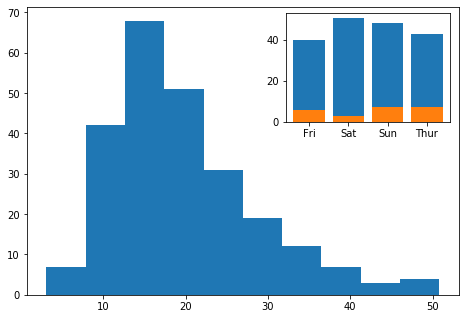

In [22]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'])

<BarContainer object of 4 artists>

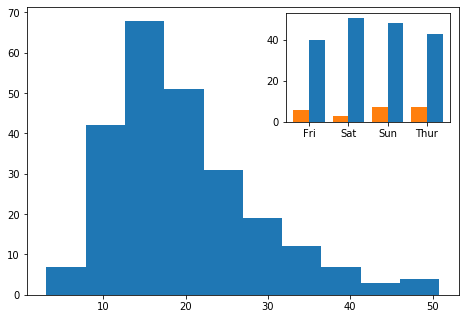

In [23]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge')

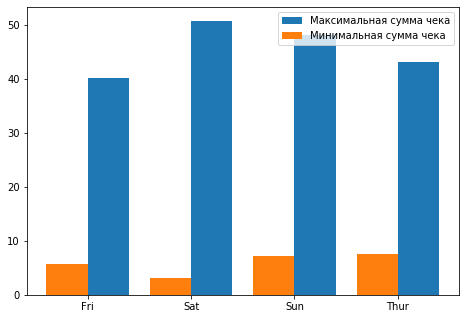

In [24]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

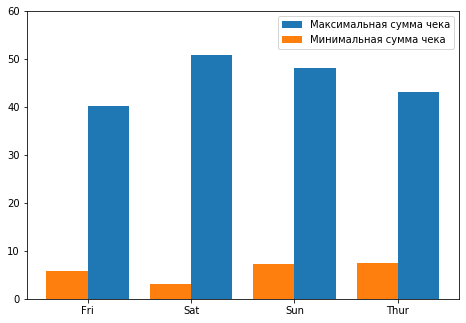

In [25]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

# Subplots

Разместить в одном пространстве несколько графиков можно и с помощью метода subplots. В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики. При желании можно задать размер фигуры в дюймах (ширина*высота):

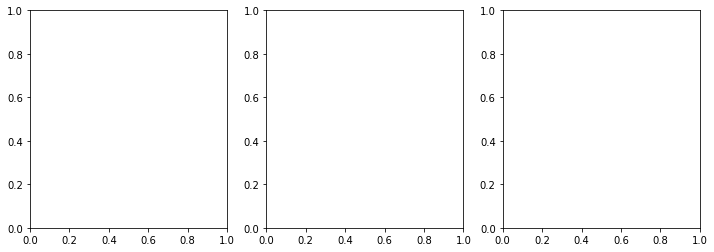

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 10.8 Создание линейных графиков

In [27]:
import numpy as np 

In [28]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

Отрисовка одной кривой
Функция matplotlib.pyplot.plot позволяет отрисовать последовательность значений. Первым аргументом подается последовательность чисел аргумента, вторым — последовательность значений функции для каждого аргумента:

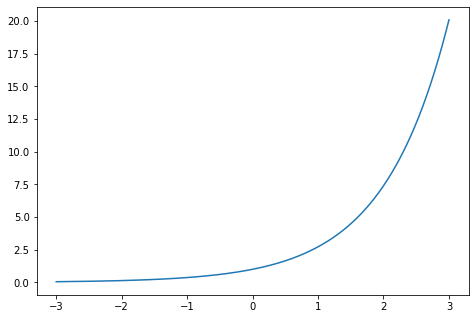

In [29]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

Отрисовка нескольких кривых
Функцию plot можно вызвать несколько раз для отрисовки дополнительного контента. В таком случае отрисовка будет выполнена в том же matplotlib.pyplot.figure, который в данном случае создается автоматически при первой отрисовке. Для примера добавим к нашему графику какой-нибудь полином третьей степени:

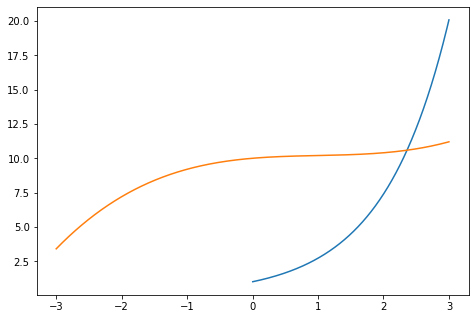

In [30]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

Воспользуемся функцией matplotlib.pyplot.figure для создания фигуры заданного размера. Размер фигуры задается в дюймах. При этом для отображения на реальном дисплее количество пикселей определяется за счет установленного dpi — dots per inch (по умолчанию 100).

При визуализации большого объема данных часто приходится выделять те или иные графики. Как и при написании текстов, это можно сделать с помощью форматирования. Форматирование линии определяется стилем отрисовки, маркировкой или и тем и другим одновременно. Описание возможных стилей и маркеров можно посмотреть в документации.

Отрисуем линию в стиле "dashed line":

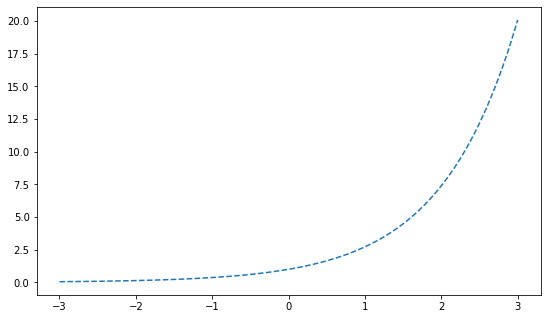

In [31]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

Цвета и маркеры

Чтобы задать тип маркера и цвет линии, воспользуемся методом форматирования линии. Его структура — это строка, содержащая в полном виде символы, обозначающие цвет маркера, тип маркера и тип линии. Возможен пропуск любого количества из этих трёх параметров. Мы отрисуем линию в фиолетовом цвете ('m' — magenta) с маркером ромба ('D' — diamond marker):

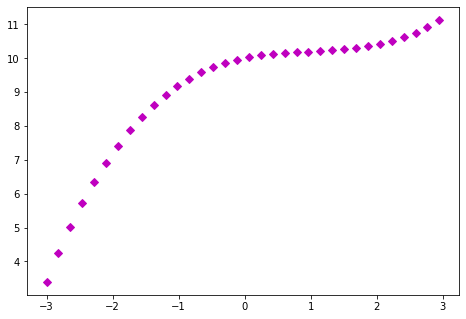

In [32]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

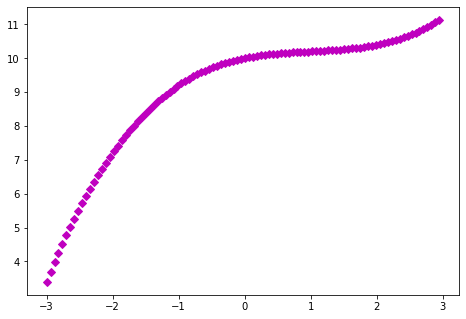

In [33]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::10], y2[::10], 'mD')

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

# 10.9 Гистограммы распределения признаков

Гистограммы распределения признаков

Seaborn — графическая библиотека с большими функциональными возможностями, позволяющая создавать разные типы графиков и использовать расширенные настройки при оформлении. Многие функции Seaborn интегрируются с библиотекой Matplotlib, что создает дополнительные возможности для творчества при визуализации данных.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
import warnings; warnings.simplefilter('ignore')

In [36]:
df = pd.read_csv('tips.csv')

Для построения гистограммы распределения количественных признаков в библиотеке Seaborn (версия 0.11.1) можно использовать метод distplot. Перед применением метода установим стандартные параметры отображения графиков с помощью команды sns.set():

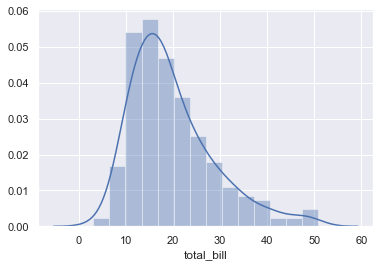

In [37]:
sns.set()
sns.distplot(df['total_bill'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Тип графика, используемый для этого, называется jointplot:

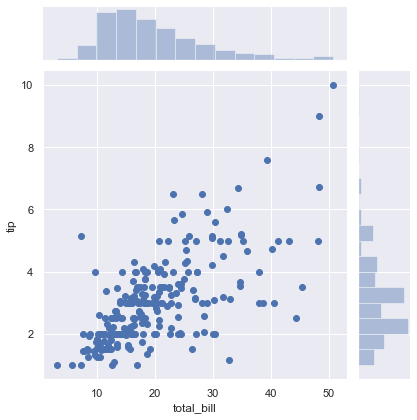

In [38]:
sns.jointplot(x='total_bill', y = 'tip', data =df)

Характер представления информации в центральной части графика можно регулировать с помощью параметра kind. Например, kind = 'reg' выводит на экран не только точки, представляющие данные об отдельных посещениях ресторана, но и линию регрессии, выражающую общий характер связи между двумя величинами:

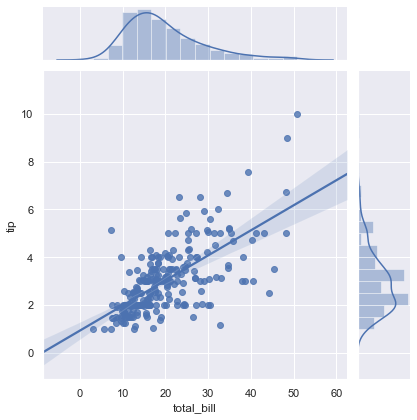

In [39]:
sns.jointplot(x='total_bill', y = 'tip', data = df, kind = 'reg')

Другой быстрый и наглядный способ отобразить гистограммы распределения количественных признаков и особенности связей между ними — построить график типа pairplot:

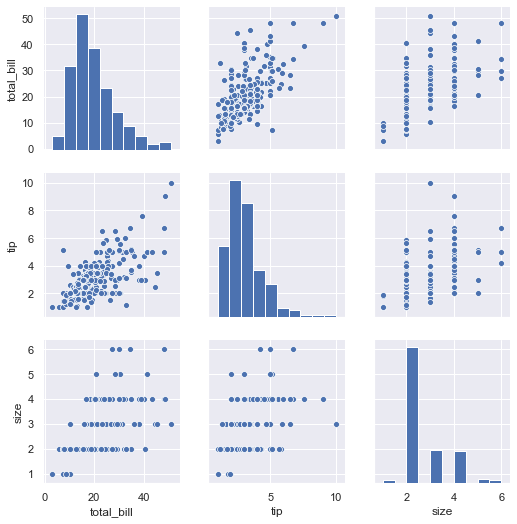

In [40]:
sns.pairplot(df)

# 10.10 Работа с категориальными признаками

Работа с категориальными признаками

Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib приходится предварительно обрабатывать датафрейм, группируя нужные данные. В Seaborn такой проблемы нет: при построении графиков можно обращаться к столбцам с категориальными признаками напрямую. Для построения гистограммы распределения категориального признака можно воспользоваться методом countplot:

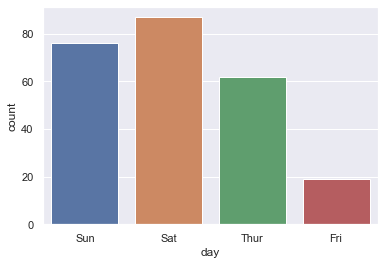

In [41]:
sns.countplot(x = 'day', data = df)

Категориальные значения при построении графиков можно использовать в качестве одного из параметров метода barplot. Он позволяет разделить датафрейм на группы в зависимости от значения категориальной переменной. По умолчанию для каждой группы вычисляется среднее значение заданной количественной переменной. Вместо среднего значения можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator.

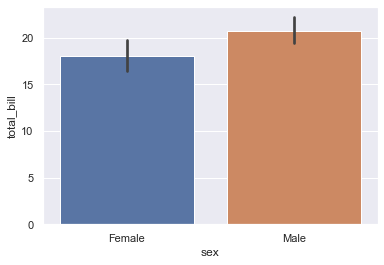

In [42]:
sns.barplot(x = 'sex', y = 'total_bill', data = df)

In [43]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=098ae41f7549526eed209d9d1645b3db06c3a72c2cf9ebbb9e12c807dbb0edea
  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [44]:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-cp37-none-any.whl size=68730 sha256=0f1de2f94511f7830d4682355cb69273f15370d40462bbb2bcab5eaa2364d88e
  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\7d\ba\8d\38b672c3e40d8bd22dd60b8e6e29965b43f2b4be4d064e44d5
Successfully built cufflinks


In [45]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [46]:
init_notebook_mode(connected = True)
cf.go_offline()

In [47]:
df = pd.read_csv('tips.csv')

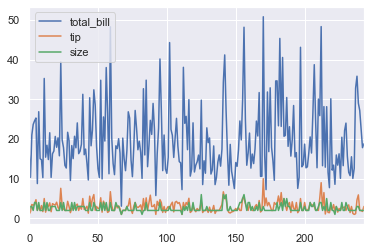

In [48]:
df.plot()

In [49]:
df.iplot()